# Star Wars Survey

## Read data

In [68]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats  as stats
from numpy import *


In [69]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [70]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [71]:
star_wars.shape

(1187, 38)

## Data cleaning

Remove rows were RespondentID is NaN

In [72]:
star_wars = star_wars.dropna(subset=["RespondentID"])
star_wars.shape

(1186, 38)

Convert column "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?" from yes/no to true/false

In [73]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
    
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
          

Convert the columns "Which of the following Star Wars films have you seen? Please select all that apply.", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8" into True/False based on whether the person saw the movie or not. Rename these columns to be seen_1 through seen_6


In [74]:
movies_dict = {
    NaN: False,
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True, 
    "Star Wars: Episode V The Empire Strikes Back": True, 
    "Star Wars: Episode VI Return of the Jedi": True
    
}


for x in star_wars.columns[3:9]:
    star_wars[x] = star_wars[x].map(movies_dict)

In [75]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2", 
    "Unnamed: 5": "seen_3", 
    "Unnamed: 6": "seen_4", 
    "Unnamed: 7": "seen_5", 
    "Unnamed: 8": "seen_6"
})

Convert columns 10 to 16 (asking about ranking movies from 1 to 6) into a number (float). Alter names of columns to "ranking_1" to "ranking_6"

In [76]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [77]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2", 
    "Unnamed: 11": "ranking_3", 
    "Unnamed: 12": "ranking_4", 
    "Unnamed: 13": "ranking_5", 
    "Unnamed: 14": "ranking_6"
})

Columns 15 to 29 contain data on the characters respondents view favorably and unfavorably. What are all the possible responses?

In [78]:
star_wars.iloc[:,18].value_counts()

Somewhat favorably                             269
Very favorably                                 245
Neither favorably nor unfavorably (neutral)    135
Somewhat unfavorably                            83
Unfamiliar (N/A)                                52
Very unfavorably                                39
Name: Unnamed: 18, dtype: int64

Create a rank from 0 to 5, with 1 being very unfavorably and 5 being very favorably, and 0 being unfamiliar.

In [79]:
character_dict = {
    "Unfamiliar (N/A)" : 0,
    "Very unfavorably" : 1,
    "Somewhat unfavorably" : 2, 
    "Neither favorably nor unfavorably (neutral)" : 3,
    "Somewhat favorably" : 4, 
    "Very favorably" : 5
}

for x in star_wars.columns[15:29]:
    star_wars[x] = star_wars[x].map(character_dict)

These are the characters that are asked about from columns 15 to 29: 

Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala, Yoda

In [80]:
star_wars = star_wars.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker", 
    "Unnamed: 17": "Princess Leia Organa", 
    "Unnamed: 18": "Anakin Skywalker", 
    "Unnamed: 19": "Obi Wan Kenobi", 
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3P0", 
    "Unnamed: 25": "R2 D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Amidala", 
    "Unnamed: 28": "Yoda"
})

# Which Star Wars movie is the most highly ranked?

Take the mean of all the ranking columns. Note that 1 was the highest and 6 the lowest, so the lower the mean scores the more highly ranked the movie was. 

In [81]:
avg_rankings = star_wars.mean()[9:15]
avg_rankings

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

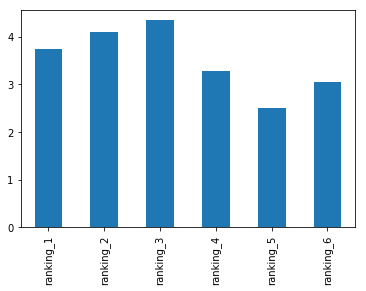

In [82]:
avg_rankings.plot(kind = "bar")

Movie 5 ("Star Wars: Episode V The Empire Strikes Back") has the highest ranking (remember 1 is the best, 6 is the worst). The 3 movie ("Star Wars: Episode III Revenge of the Sith") has the worst rankings. In general movies 4 to 6, which are the original movies made in the 1970s/1980s have a higher average ranking than movies 1 to 3, which are the later movies made in the 2000s. 

# Which Star Wars movie was the most seen

Take the sum of all the seen columns. Note that the columns is True/False, where True means they have seen the movie and False means they have not. Thus the higher the sum, the more people have seen that movie. 

In [83]:
seen_sums = star_wars.sum()[3:9]
seen_sums

seen_1    673.0
seen_2    571.0
seen_3    550.0
seen_4    607.0
seen_5    758.0
seen_6    738.0
dtype: float64

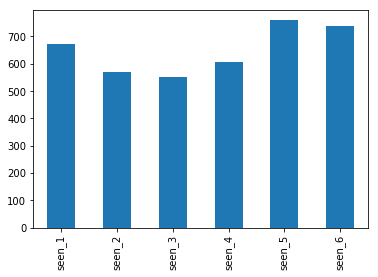

In [84]:
seen_sums.plot(kind = "bar")

The last two movies (5 and 6, which are the last two of the original trilogy) have been seen the most. The first movies of the new trilogy (movie 1) seen the third most, but then the next 2 movies in that trilogy set were not seen as much. 

# Does movie watching correlate with how many people saw the movie

Look at the correlation between having seen the movie and what rank it was given.

In [85]:
for x in range(3,9):
    r
    num2 = x + 6
    col2 = star_wars.columns[num2]
    print(col1, col2, star_wars[col1].corr(star_wars[col2]))

seen_1 ranking_1 0.067218198863
seen_2 ranking_2 0.0417106292433
seen_3 ranking_3 -0.181000653922
seen_4 ranking_4 -0.554932121974
seen_5 ranking_5 -0.422225791567
seen_6 ranking_6 -0.509608557224


There is a negative correlation for the original trilogy (movie 4,5,6) which means that the more people who saw the movie (giving a 1) the more highly the rated the movie (giving it a 1), with movie 4 having the highest negative corrleation. For the second trilogy (movies 1,2,3), movies 1 and 2 have a positive correlation (the more people who saw the movie the lower they ranked the movie) with movie 1 having the highest positive correlation, although these are only very modestly positively correlated. This is not true for movie 3 (the last of the second trilogy) which has a negative correlation. 

# Do you consider yourself to be a fan of the Star Wars film franchise?

Group data by whether or not people consider themselves to be a Star Wars fan and assess if they've seen the movies and how they rated them.

In [86]:
sum_seen_fan = star_wars.groupby("Do you consider yourself to be a fan of the Star Wars film franchise?").sum().iloc[:,2:8]
sum_seen_fan

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,173.0,108.0,100.0,124.0,220.0,201.0
True,500.0,463.0,450.0,483.0,538.0,537.0


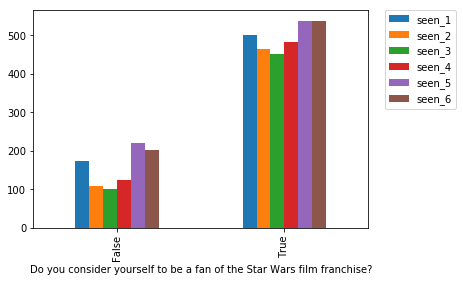

In [87]:
sum_seen_fan.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

People who consider themselves Star Wars fans (True group) have seen the movies more than those who don't (False group), but is this skewed because there are just more Star Wars fans in the dataset, if we look at averages we will have a slightly better idea if the number who saw the movie is higher because there are just more people for that category. 

In [88]:
avg_seen_fan = star_wars.groupby("Do you consider yourself to be a fan of the Star Wars film franchise?").mean().iloc[:,2:8]
avg_seen_fan

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,0.609155,0.380282,0.352113,0.43662,0.774648,0.707746
True,0.905797,0.838768,0.815217,0.87500,0.974638,0.972826


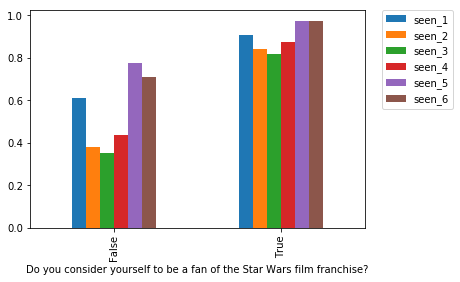

In [89]:
avg_seen_fan.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Even looking at the average (close to 1 means they saw the movie, close to 0 means they did not), we see those people who consider themselves fans (True group) saw all the movies more than those who did not (False) group. 

Perform a chi2 test to see if these differences are greater than expected. 

In [90]:
for x in range(3,9):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Do you consider yourself to be a fan of the Star Wars film franchise?", col1]).size()
    ctsum = group_size.unstack("Do you consider yourself to be a fan of the Star Wars film franchise?")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum)
    print(col1, p)

seen_1 2.95622657301e-24
seen_2 4.9524814299e-41
seen_3 2.63067767188e-40
seen_4 8.03010919732e-41
seen_5 1.53889049654e-20
seen_6 5.67978270224e-29


For all 6 movies, there is a significant difference in movie viewing based on whether or not you consider yourself to be a Star Wars fan. 

Performing a simple t-test, we see that 

In [91]:
avg_rank_fan = star_wars.groupby("Do you consider yourself to be a fan of the Star Wars film franchise?").mean().iloc[:,8:16]
avg_rank_fan

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,,,
False,2.936396,3.591549,4.193662,3.933099,2.862676,3.471831,4.125448,4.24911
True,4.141304,4.342391,4.417423,2.932971,2.333333,2.829710,4.821818,4.70000


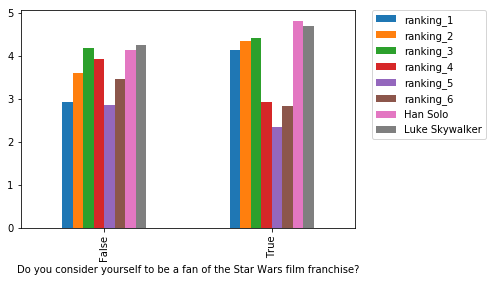

In [92]:
avg_rank_fan.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

People who consider themselves Star Wars fans (True group) ranked the second trilogy lower than those who did not (movies 1,2,3), they also ranked the orignal trilogy (movies 4,5,6) higher (lower number) than those who did not consider themselves fans (False group). 

Perform a chi2 test to see if these differences are greater than expected. 

In [93]:
for x in range(9,15):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Do you consider yourself to be a fan of the Star Wars film franchise?", col1]).size()
    ctsum = group_size.unstack("Do you consider yourself to be a fan of the Star Wars film franchise?")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum)
    print(col1, p)

ranking_1 2.03171226524e-23
ranking_2 3.49923011607e-14
ranking_3 0.00109293984789
ranking_4 2.42013048789e-17
ranking_5 9.83003803274e-08
ranking_6 1.94423222593e-15


For all 6 movies, there is a significant difference in how the movies are ranked based on whether or not you consider yourself to be a Star Wars fan.  Interestingly, difference is the least significant for movie 3, suggesting for this movie the two groups were closer than all other movies in how they ranked it. 

# Do you consider yourself to be a fan of the Star Trek franchise?

Assess whether people who like Star Trek also watch Star Wars films and how well they like them. 

In [94]:
sum_seen_trek = star_wars.groupby("Do you consider yourself to be a fan of the Star Trek franchise?").sum().iloc[:,2:8]
sum_seen_trek

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,
No,301.0,228.0,221.0,258.0,353.0,334.0
Yes,364.0,336.0,322.0,342.0,397.0,396.0


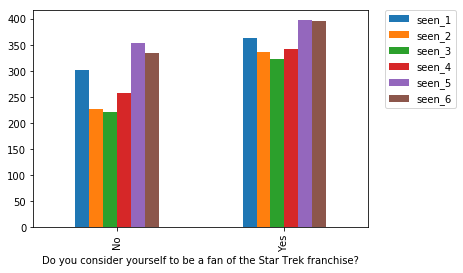

In [95]:
sum_seen_trek.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

People who are fans of Star Trek (Yes group) went to see all Star Wars movies more than those who are not fans (No group). 

In [96]:
avg_seen_trek = star_wars.groupby("Do you consider yourself to be a fan of the Star Trek franchise?").mean().iloc[:,2:8]
avg_seen_trek

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,
No,0.469579,0.355694,0.344774,0.402496,0.550702,0.521061
Yes,0.852459,0.786885,0.754098,0.800937,0.929742,0.927400


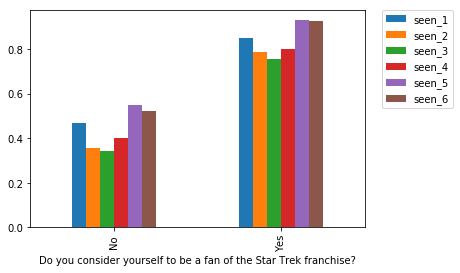

In [97]:
avg_seen_trek.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This remains true when looking at the average as well. Star Trek fans (Yes group) went to see the Star Wars movies more often than those who are not Star Trek fans (No group). 

Perform a simple chi2 test

In [98]:
for x in range(3,9):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Do you consider yourself to be a fan of the Star Trek franchise?", col1]).size()
    ctsum = group_size.unstack("Do you consider yourself to be a fan of the Star Trek franchise?")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum)
    print(col1, p)

seen_1 2.69161840866e-36
seen_2 4.14291778792e-43
seen_3 6.79162155852e-39
seen_4 1.80126860746e-37
seen_5 8.58181330329e-40
seen_6 4.85715655487e-44


For all 6 movies, there is a significant difference in movie viewing based on whether or not you consider yourself to be a Star Trek fan. 

In [99]:
avg_rank_trek = star_wars.groupby("Do you consider yourself to be a fan of the Star Trek franchise?").mean().iloc[:,8:16]
avg_rank_trek

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,,,
No,3.487864,3.915254,4.278450,3.433414,2.634383,3.244552,4.392157,4.427873
Yes,3.968675,4.255422,4.403382,3.110843,2.407229,2.850602,4.774818,4.661836


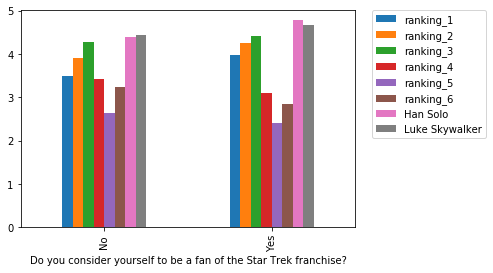

In [100]:
avg_rank_trek.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Star Trek fans (Yes group) disliked (higher bar means lower ranking) the second trilogy (movies 1,2,3) more than those who were not Star Trek fans (No group). Star Trek fans also liked the original trilogy (movies 1,2,3) more than non-Star Trek fans. 

Perform a simple chi2 test

In [101]:
for x in range(9,15):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Do you consider yourself to be a fan of the Star Trek franchise?", col1]).size()
    ctsum = group_size.unstack("Do you consider yourself to be a fan of the Star Trek franchise?")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum)
    print(col1, p)

ranking_1 6.47757417973e-05
ranking_2 0.011195426917
ranking_3 0.560122836259
ranking_4 0.00776898617744
ranking_5 0.105000029999
ranking_6 4.120691557e-05


Interestingly, unlike for Star Wars fans, there is not a strong a difference in how the movies were ranked based on whether or not you considered yourself a fan of Star Trek.  For movies 3 and 5, these was no difference in movie ranking between the groups. For movies 1 and 6, there are a strong difference in movie rankings between the group, and a significant (at an alpha level of 0.05) difference in movie rankings between groups for movie 2 and movie 4, but not as strong as movies 3 and 5.

# Gender effects on movie rankings

Split the sample by gender to see if there are difference in which movie was like by gender.  First assessing if one gender saw the movies more than another, and then assessing whether gender impacted movie rankings. 

In [102]:
sum_seen_gender = star_wars.groupby("Gender").sum().iloc[:,2:8]
sum_seen_gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,298.0,237.0,222.0,255.0,353.0,338.0
Male,361.0,323.0,317.0,342.0,392.0,387.0


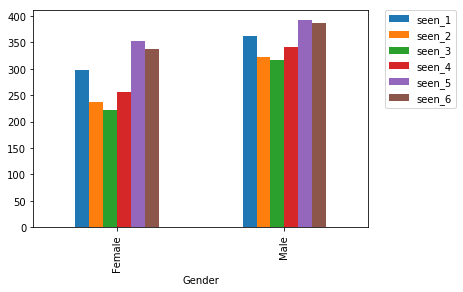

In [103]:
sum_seen_gender.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Males have seen the movies more than females (1 being seen the movie and 0 being not seen). This could be because there are more males in the dataset. 

In [104]:
avg_seen_gender = star_wars.groupby("Gender").mean().iloc[:,2:8]
avg_seen_gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665
Male,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672


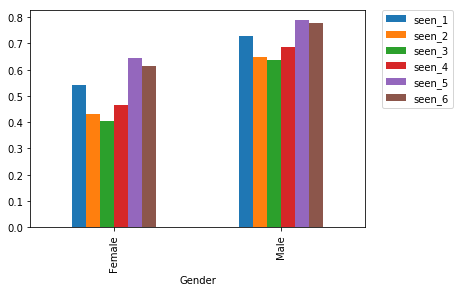

In [105]:
avg_seen_gender.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Perform a simple chi2 test.

In [106]:
for x in range(3,9):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Gender", col1]).size()
    ctsum = group_size.unstack("Gender")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum)
    print(col1, p)

seen_1 1.2303683188e-09
seen_2 2.48595676851e-12
seen_3 7.28405275255e-14
seen_4 4.65073409884e-13
seen_5 2.88001744191e-07
seen_6 1.68781646442e-08


There are strong differences in whether or not a movie was seen for all 6 movies based on gender. 

Even looking at the average, Males were more likely to see these movies than females. 

In [124]:
avg_rank_gender = star_wars.groupby("Gender").mean().iloc[:,8:14]
avg_rank_gender

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


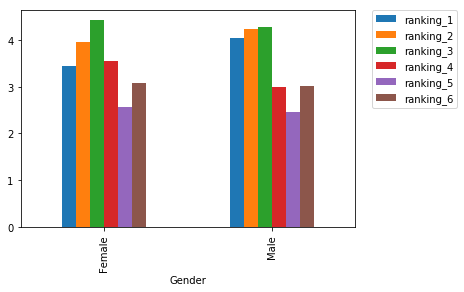

In [125]:
avg_rank_gender.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Higher rankings mean the movies was less liked. Females dislike the 3rd movie the most, and liked the 5th the best. In general, both genders like the original trilogy (movies 4,5,6) more than the second trilogy (movies 1,2,3), however females did not dislike movie 1 to the same degrees as males. 

Perform a simple chi2 test.

In [126]:
for x in range(9,15):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Gender", col1]).size()
    ctsum = group_size.unstack("Gender")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum)
    print(col1, p)

ranking_1 3.44813072336e-08
ranking_2 0.00787089297339
ranking_3 0.234529085908
ranking_4 2.23922112131e-05
ranking_5 0.448574185723
ranking_6 0.00671825262922


Only some movies have differences in ranking between genders. For movies 3 and 5, there is no difference in rankings based on gender. For the other 4 movies (1, 2, 4, and 6), there is a difference in how the movies are ranked between genders. 

# Which character do respondents like/dislike the most?

In [110]:
avg_char = star_wars.mean()[15:29]
avg_char.sort_values()

Jar Jar Binks           2.411693
Emperor Palpatine       2.482801
Boba Fett               2.811576
Padme Amidala           2.878378
Lando Calrissian        2.980488
Darth Vader             3.437046
Anakin Skywalker        3.537060
C-3P0                   4.324063
Princess Leia Organa    4.511432
R2 D2                   4.514458
Obi Wan Kenobi          4.536970
Luke Skywalker          4.547533
Yoda                    4.573850
Han Solo                4.587455
dtype: float64

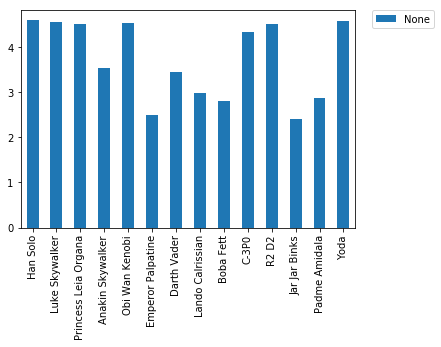

In [111]:
avg_char.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

People dislike Jar Jar Binks, Emperor Palpatine, Boba Fett, Padme Amidala, and Lando Calrissian are the 5 least liked, with Emperor Palpatine and Boba Fett being from the dark side, and the others not (but Lando Calrissian does set them up). The most well liked are Han Solo, Yoda, Luke Skywalker, Obi Wan Kenobi, and R2 D2, who are all members of the good side. 

##  Character likes/dislikes by Gender

In [112]:
avg_char_gender = star_wars.groupby("Gender").mean().iloc[:,15:29]
avg_char_gender

,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Gender,,,,,,,,,,,,,
Female,4.577215,4.555838,3.614796,4.572519,2.140625,3.164975,2.750643,2.438642,4.473282,4.664975,2.526992,2.787013,4.662437
Male,4.530952,4.475059,3.443373,4.512019,2.777778,3.704327,3.178313,3.132850,4.181818,4.380952,2.278846,2.932203,4.500000


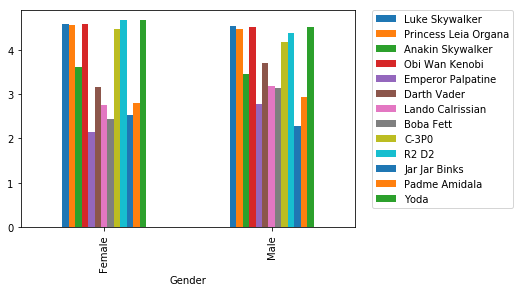

In [113]:
avg_char_gender.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [114]:
char_chi_results = []
for x in range(15,29):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Gender", col1]).size()
    ctsum = group_size.unstack("Gender")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum.dropna()) 
    char_chi_results.append({"Character" : col1, "Pvalues":p})
pd.DataFrame(char_chi_results).sort_values(by="Pvalues")

,Character,Pvalues
8,Boba Fett,3.416951e-07
9,C-3P0,1.282318e-06
5,Emperor Palpatine,3.215180e-06
10,R2 D2,3.494201e-06
11,Jar Jar Binks,6.895845e-05
6,Darth Vader,9.155293e-05
7,Lando Calrissian,1.494771e-03
12,Padme Amidala,2.883252e-02
13,Yoda,4.676632e-02
3,Anakin Skywalker,5.734954e-02


There are only some character were they are differently liked or disliked between genders. Boba Fett, C-3P0, Emperor Palpatine, R2 D2, Jar Jar Binks, Darth Vader, Lando Calrissian, Padme Amidala, Yoda are all liked significantly differnt by gender (at an alpha level of 0.05). Boba Fett is the most strongly different between genders, with males rating him more highly than females. 

# Education

Examine if education level changes if you seen the movie or how you ranked it.  Education is non-binary. Get a list of possible outcomes for Education.

In [115]:
star_wars["Education"].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

Convert to numeric by ranking from 1 to 5 Education, with 1 being no high school degree and 5 being has a graduate degree. 

In [116]:
education_dict = {
    "Less than high school degree" : 1,
    "High school degree" : 2,
    "Some college or Associate degree" : 3, 
    "Bachelor degree" : 4,
    "Graduate degree" : 5
}

star_wars["Education"] = star_wars["Education"].map(education_dict)

In [118]:
star_wars["Education"].mean()

3.7258687258687258

On average, the sample has some college degree and very close to on average having a Bachelor's degree. 

In [121]:
edu_seen = star_wars.groupby("Education").mean().iloc[:,2:8]
edu_seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Education,,,,,,
1.0,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
2.0,0.542857,0.457143,0.457143,0.504762,0.580952,0.571429
3.0,0.643293,0.567073,0.557927,0.548780,0.692073,0.679878
4.0,0.641745,0.529595,0.507788,0.607477,0.757009,0.728972
5.0,0.650909,0.541818,0.505455,0.592727,0.752727,0.730909


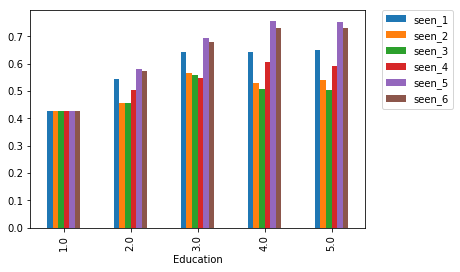

In [122]:
edu_seen.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [123]:
seen_edu_chi = []
for x in range(3,9):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Education", col1]).size()
    ctsum = group_size.unstack("Education")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum.dropna()) 
    seen_edu_chi.append({"Education" : col1, "Pvalues":p})
pd.DataFrame(seen_edu_chi).sort_values(by="Pvalues")

,Education,Pvalues
4,seen_5,0.001455
5,seen_6,0.008310
0,seen_1,0.233821
3,seen_4,0.250579
1,seen_2,0.365314
2,seen_3,0.382010


There was a difference in whether a movie was seen by education level for movie 5 and 6. People without a high school degree rated those movies lower than all other groups. 

In [128]:
avg_rank_edu = star_wars.groupby("Education").mean().iloc[:,8:14]
avg_rank_edu

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,
1.0,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
2.0,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
3.0,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228
4.0,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
5.0,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354


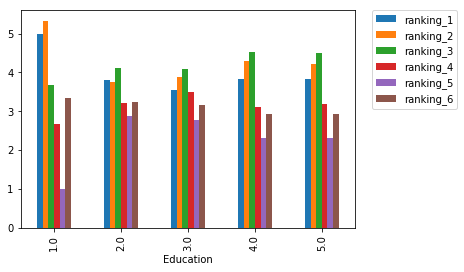

In [129]:
avg_rank_edu.plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [134]:
rank_edu_chi = []
for x in range(9,15):
    col1 = star_wars.columns[x]
    group_size = star_wars.groupby(["Education", col1]).size()
    ctsum = group_size.unstack("Education")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum.dropna()) 
    rank_edu_chi.append({"Education" : col1, "Pvalues":p})
pd.DataFrame(rank_edu_chi).sort_values(by="Pvalues")

,Education,Pvalues
3,ranking_4,0.005103
2,ranking_3,0.051085
5,ranking_6,0.125964
0,ranking_1,0.384273
1,ranking_2,0.896270
4,ranking_5,1.000000


There was a difference in movie rankings by education level for movie 4 (at an alpha level of 0.05). People without a high school degree ranked it lower than all other education levels

# Which character shot first?

In [137]:
star_wars["Which character shot first?"].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

Most people think Han shot first. 

In [158]:
shot_complete = star_wars[ star_wars["Which character shot first?"] != "I don't understand this question"] 

In [159]:
shot_complete.groupby(["Which character shot first?"]).mean().iloc[:,2:8]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Which character shot first?,,,,,,
Greedo,0.878173,0.761421,0.730964,0.791878,0.908629,0.908629
Han,0.870769,0.815385,0.800000,0.883077,0.963077,0.956923


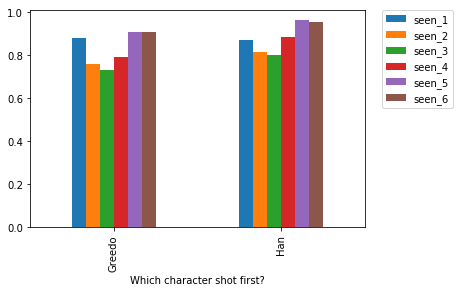

In [160]:
shot_complete.groupby(["Which character shot first?"]).mean().iloc[:,2:8].plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [161]:
seen_shot_chi = []
for x in range(3,9):
    col1 = shot_complete.columns[x]
    group_size = shot_complete.groupby(["Which character shot first?", col1]).size()
    ctsum = group_size.unstack("Which character shot first?")
    chi2, p, dof, ex = stats.chi2_contingency(ctsum.dropna()) 
    seen_shot_chi.append({"Seen" : col1, "Pvalues":p})
pd.DataFrame(seen_shot_chi).sort_values(by="Pvalues")

,Pvalues,Seen
3,0.007096,seen_4
4,0.016535,seen_5
5,0.041211,seen_6
2,0.085440,seen_3
1,0.171121,seen_2
0,0.911725,seen_1


People 

In [146]:
star_wars.groupby(["Which character shot first?"]).mean().iloc[:,8:14]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Which character shot first?,,,,,,
Greedo,3.857868,4.238579,4.426396,3.101523,2.370558,3.005076
Han,4.295385,4.298462,4.385802,2.769231,2.332308,2.913846
I don't understand this question,3.042623,3.761438,4.238562,3.915033,2.816993,3.215686


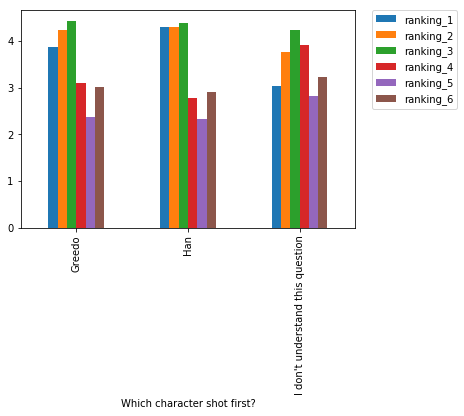

In [147]:
star_wars.groupby(["Which character shot first?"]).mean().iloc[:,8:14].plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [153]:
star_wars.groupby(["Which character shot first?"]).mean().iloc[:,15:28]

,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Which character shot first?,,,,,,,,,,,,,
Greedo,4.653061,4.607143,3.917526,4.610256,2.786458,3.362694,3.333333,3.046154,4.411458,4.605128,2.646154,3.304124,4.693878
Han,4.594427,4.582043,3.462733,4.707165,2.852665,3.771605,3.514019,3.310345,4.422840,4.600619,2.311728,3.245342,4.715170
I don't understand this question,4.424342,4.365132,3.354515,4.305648,1.864407,3.106312,2.158784,2.099656,4.148515,4.361842,2.346939,2.162069,4.341137


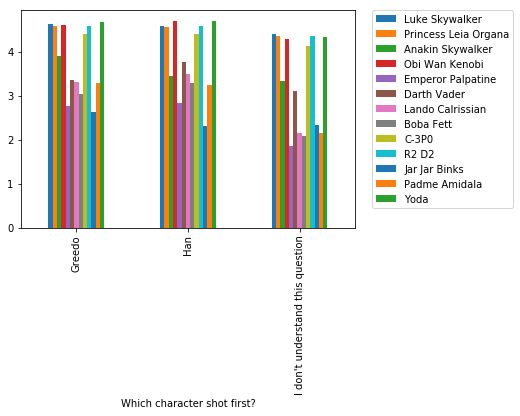

In [154]:
star_wars.groupby(["Which character shot first?"]).mean().iloc[:,15:28].plot(kind = "bar").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# Location (Census Region)